<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/08_using-a-pretrained-convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 240 (delta 12), reused 6 (delta 6), pack-reused 213
Receiving objects: 100% (240/240), 20.38 MiB | 33.99 MiB/s, done.
Resolving deltas: 100% (111/111), done.
/content/SRU-deeplearning-workshop


## Keras Applications  

We use this library in order to import the famous pretrained models. In this way we can use the weights of the models.  
Available models:  
https://keras.io/api/applications/  


If you can't download the models:    
[cannot download vgg16_weights](https://github.com/fchollet/deep-learning-models/issues/33)
<br>
You can download it manually from here: https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
and paste it on
~/.keras/models [the default directory of downloaded models]  
```
import os
os.path.expanduser('~/.keras/models')
```


In [2]:
! pip install --quiet keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00


In [13]:
from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [37]:
# weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), 
# or the path to the weights file to be loaded.
model = VGG16(weights='imagenet')

In [38]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
print(model.input_shape)
print(model.input)
print(model.output)
print(model.output_shape)

(None, 224, 224, 3)
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='predictions/Softmax:0', description="created by layer 'predictions'")
(None, 1000)


<class 'PIL.Image.Image'>


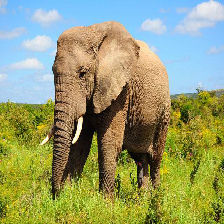

In [40]:
'''
each network has its own preprocessing approach

Note: each Keras Application expects a specific kind of input preprocessing. 
For VGG16, call tf.keras.applications.vgg16.preprocess_input on your inputs 
before passing them to the model. vgg16.preprocess_input will convert the input images from RGB to BGR, 
then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input 
shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first 
data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. 
E.g. (200, 200, 3) would be one valid value.
'''
img_path = './image/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))
img

In [41]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [42]:
# for preprocess_input > x must be [#samples,w,h,#channels]

# x = x.reshape((1,)+x.shape)
# print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [43]:
preds = model.predict(x)
print(preds.shape)

# the probability of winner class and find the argmax > you can find in json file
print(np.max(preds))
print(np.argmax(preds))

1/1 [==============================] - 0s 230ms/step
(1, 1000)
0.42774552
386


In [44]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.42774552), ('n01871265', 'tusker', 0.3908151), ('n02504013', 'Indian_elephant', 0.17831324)]
